In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../input/fetal-health-classification/fetal_health.csv" , sep = ",")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2126 entries, 0 to 2125

Data columns (total 22 columns):

 #   Column                                                  Non-Null Count  Dtype  

---  ------                                                  --------------  -----  

 0   baseline value                                          2126 non-null   float64

 1   accelerations                                           2126 non-null   float64

 2   fetal_movement                                          2126 non-null   float64

 3   uterine_contractions                                    2126 non-null   float64

 4   light_decelerations                                     2126 non-null   float64

 5   severe_decelerations                                    2126 non-null   float64

 6   prolongued_decelerations                                2126 non-null   float64

 7   abnormal_short_term_variability                         2126 non-null   float64

 8   mean_value_of_short_term_

*Checking for null values*

In [4]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

*Removing Duplicates*

In [5]:
df.duplicated().sum()

13

In [6]:
df=df.drop_duplicates()

*Exploring The distribution of the data*

In [7]:
df.shape

(2113, 22)

*Checking for outliers*

In [8]:
df2= df.copy()

baseline value                                               Axes(0.125,0.798085;0.0824468x0.0819149)
accelerations                                             Axes(0.223936,0.798085;0.0824468x0.0819149)
fetal_movement                                            Axes(0.322872,0.798085;0.0824468x0.0819149)
uterine_contractions                                      Axes(0.421809,0.798085;0.0824468x0.0819149)
light_decelerations                                       Axes(0.520745,0.798085;0.0824468x0.0819149)
severe_decelerations                                      Axes(0.619681,0.798085;0.0824468x0.0819149)
prolongued_decelerations                                  Axes(0.718617,0.798085;0.0824468x0.0819149)
abnormal_short_term_variability                           Axes(0.817553,0.798085;0.0824468x0.0819149)
mean_value_of_short_term_variability                         Axes(0.125,0.699787;0.0824468x0.0819149)
percentage_of_time_with_abnormal_long_term_variability    Axes(0.223936,0.699787;0

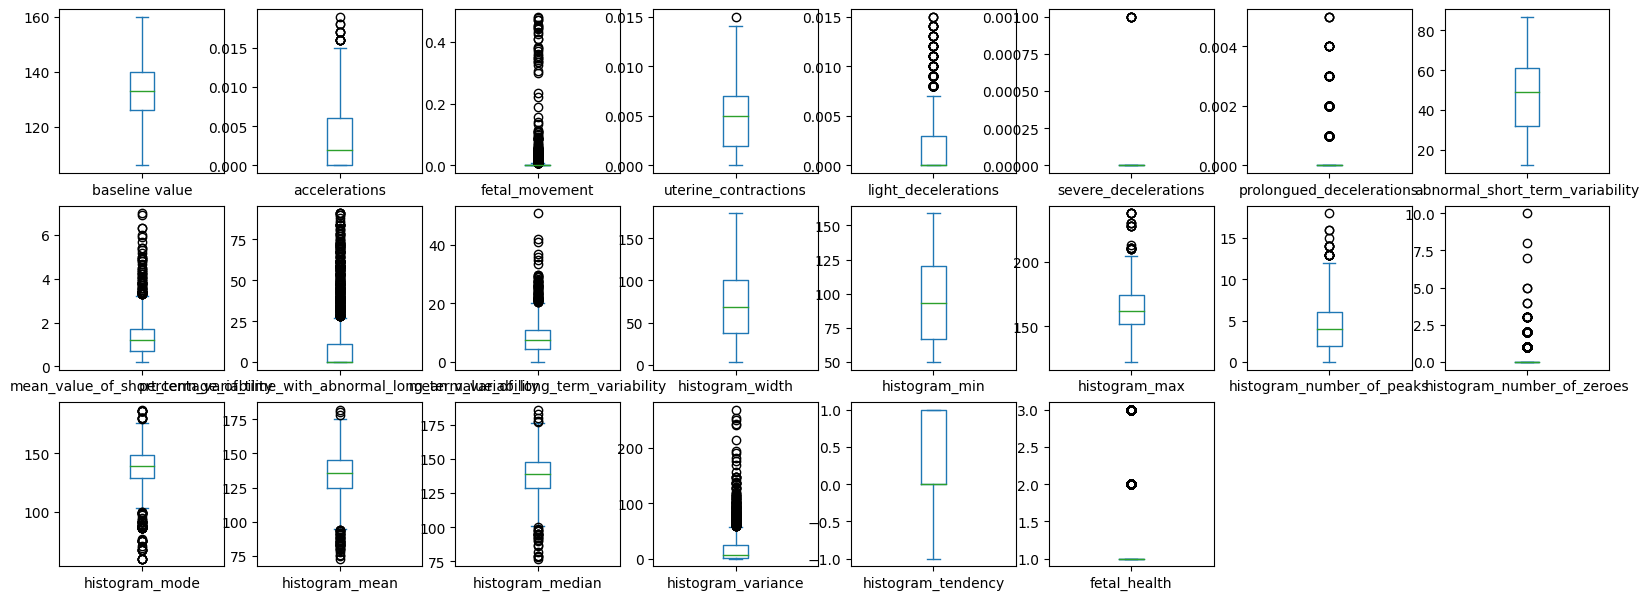

In [9]:
df.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (8,8))

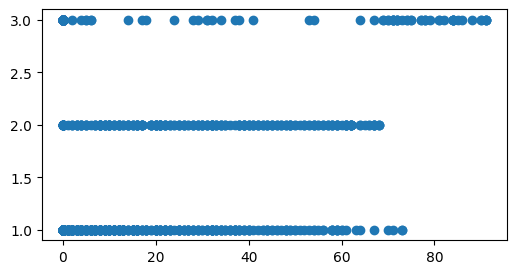

In [10]:
plt.figure(figsize=(6, 3))
plt.scatter(df['percentage_of_time_with_abnormal_long_term_variability'],df['fetal_health'])

In [11]:
df2 = df[~((df['fetal_health'] == 1) & (df['percentage_of_time_with_abnormal_long_term_variability'] > 65))]

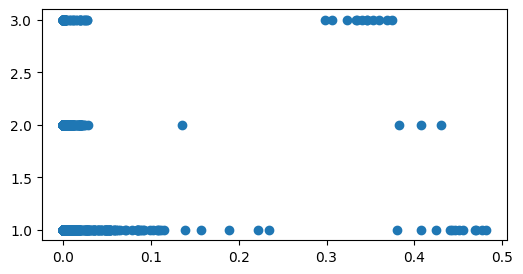

In [12]:
plt.figure(figsize=(6, 3))
plt.scatter(df['fetal_movement'],df['fetal_health'])

In [13]:
df2 = df[~((df['fetal_health'] == 2) & (df['fetal_movement'] > 0.3))]

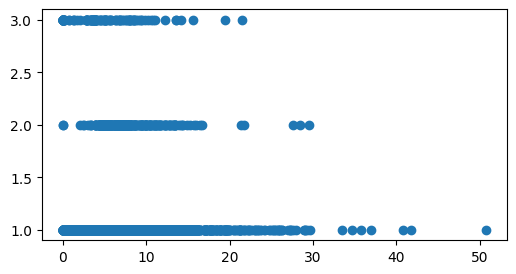

In [14]:
plt.figure(figsize=(6, 3))
plt.scatter(df['mean_value_of_long_term_variability'],df['fetal_health'])

In [15]:
df2 = df[~((df['fetal_health'] == 2) & (df['mean_value_of_long_term_variability'] > 20))]
df2 = df[~((df['fetal_health'] == 1) & (df['mean_value_of_long_term_variability'] > 33))]
df2 = df[~((df['fetal_health'] == 3) & (df['mean_value_of_long_term_variability'] > 19))]

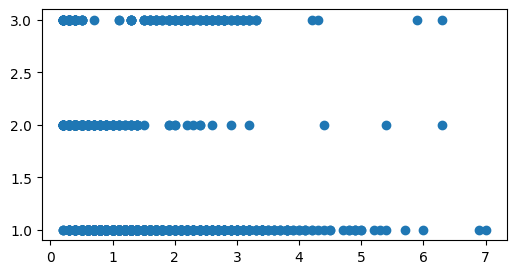

In [16]:
plt.figure(figsize=(6, 3))
plt.scatter(df['mean_value_of_short_term_variability'],df['fetal_health'])

In [17]:
df2 = df[~((df['fetal_health'] == 2) & (df['mean_value_of_short_term_variability'] > 3))]
df2 = df[~((df['fetal_health'] == 1) & (df['mean_value_of_short_term_variability'] > 6))]
df2 = df[~((df['fetal_health'] == 3) & (df['mean_value_of_short_term_variability'] > 4))]

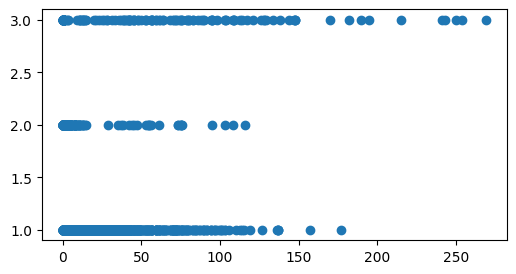

In [18]:
plt.figure(figsize=(6, 3))
plt.scatter(df['histogram_variance'],df['fetal_health'])

In [19]:
df2 = df[~((df['fetal_health'] == 1) & (df['histogram_variance'] > 150))]
df2 = df[~((df['fetal_health'] == 3) & (df['histogram_variance'] > 150))]

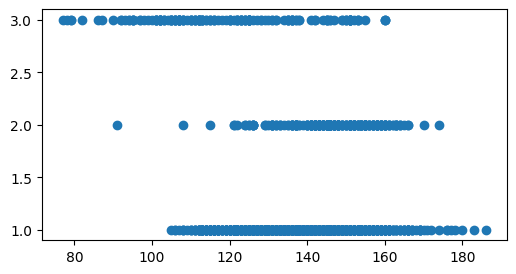

In [20]:
plt.figure(figsize=(6, 3))
plt.scatter(df['histogram_median'],df['fetal_health'])

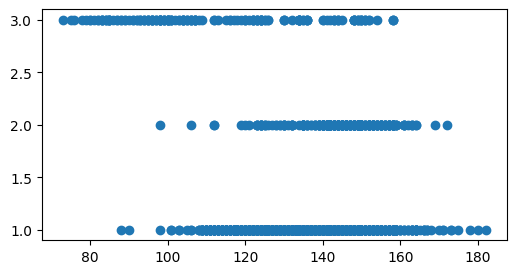

In [21]:
plt.figure(figsize=(6, 3))
plt.scatter(df['histogram_mean'],df['fetal_health'])

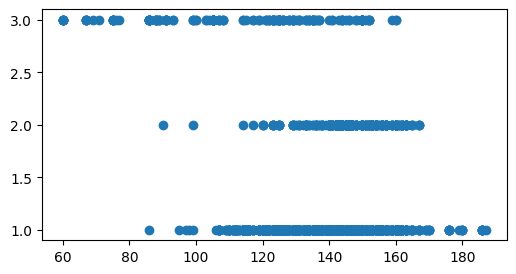

In [22]:
plt.figure(figsize=(6, 3))
plt.scatter(df['histogram_mode'],df['fetal_health'])

In [23]:
df2 = df[~((df['fetal_health'] == 1) & (df['histogram_mode'] > 167))]
df2 = df[~((df['fetal_health'] == 3) & (df['histogram_mode'] > 157))]

In [24]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df2)
scaled_data

array([[-0.92857143, -0.33333333,  0.        , ...,  3.        ,
         1.        ,  1.        ],
       [-0.07142857,  0.66666667,  0.        , ...,  0.22727273,
         0.        ,  0.        ],
       [ 0.        ,  0.16666667,  0.        , ...,  0.27272727,
         0.        ,  0.        ],
       ...,
       [ 0.5       , -0.16666667,  0.        , ..., -0.13636364,
         1.        ,  1.        ],
       [ 0.5       , -0.16666667,  0.        , ..., -0.13636364,
         1.        ,  1.        ],
       [ 0.64285714,  0.        ,  0.66666667, ..., -0.27272727,
         0.        ,  0.        ]])

In [25]:
df2 = pd.DataFrame(scaled_data, columns=df.columns)
df2

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-0.928571,-0.333333,0.000000,-1.0,0.0,0.0,0.0,0.827586,-0.7,3.909091,...,-0.584906,-1.636364,-0.50,0.0,-1.000000,0.05,-0.947368,3.000000,1.0,1.0
1,-0.071429,0.666667,0.000000,0.2,1.0,0.0,0.0,-1.103448,0.9,0.000000,...,-0.471698,1.636364,0.50,1.0,0.105263,0.00,0.052632,0.227273,0.0,0.0
2,0.000000,0.166667,0.000000,0.6,1.0,0.0,0.0,-1.137931,0.9,0.000000,...,-0.471698,1.636364,0.25,1.0,0.105263,-0.05,-0.052632,0.272727,0.0,0.0
3,0.071429,0.166667,0.000000,0.6,1.0,0.0,0.0,-1.137931,1.2,0.000000,...,-0.754717,0.363636,1.75,0.0,-0.105263,-0.10,-0.105263,0.272727,1.0,0.0
4,-0.071429,0.833333,0.000000,0.6,0.0,0.0,0.0,-1.137931,1.2,0.000000,...,-0.754717,0.363636,1.25,0.0,-0.105263,0.00,-0.052632,0.181818,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,0.500000,-0.333333,0.000000,0.4,0.0,0.0,0.0,1.034483,-1.0,2.272727,...,0.830189,0.681818,0.00,0.0,0.736842,0.70,0.684211,-0.227273,0.0,1.0
2106,0.500000,-0.166667,0.000000,0.4,0.0,0.0,0.0,1.000000,-0.8,2.000000,...,0.188679,0.318182,0.50,0.0,0.684211,0.60,0.631579,-0.181818,1.0,1.0
2107,0.500000,-0.166667,0.000000,0.4,0.0,0.0,0.0,1.034483,-0.8,1.818182,...,0.188679,0.363636,0.25,0.0,0.736842,0.60,0.684211,-0.136364,1.0,1.0
2108,0.500000,-0.166667,0.000000,0.2,0.0,0.0,0.0,1.000000,-0.8,2.454545,...,0.188679,0.318182,0.50,0.0,0.684211,0.55,0.631579,-0.136364,1.0,1.0


## Model Building

*Train Test Split*

In [66]:
x = df.drop(["fetal_health"] , axis = 1)
y = df["fetal_health"]
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

1. *Random Forest*

In [27]:
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.8838383838383839

0.9054820415879017


In [28]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support



         1.0       0.93      0.98      0.95       420

         2.0       0.74      0.58      0.65        73

         3.0       0.84      0.75      0.79        36



    accuracy                           0.91       529

   macro avg       0.84      0.77      0.80       529

weighted avg       0.90      0.91      0.90       529




In [29]:
confusion_matrix(y_test, y_pred)

array([[410,   8,   2],
       [ 28,  42,   3],
       [  2,   7,  27]])

2. *Decision Trees*

**We will start applying the rest of the models on the scaled data that has less outliers which is df2**

In [30]:
x = df2.drop(["fetal_health"] , axis = 1)
y = df2["fetal_health"]
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

In [31]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.8780025284450064

0.884469696969697


In [32]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support



         0.0       0.90      0.97      0.93       411

         1.0       0.74      0.55      0.63        76

         2.0       1.00      0.61      0.76        41



    accuracy                           0.88       528

   macro avg       0.88      0.71      0.77       528

weighted avg       0.88      0.88      0.88       528




In [33]:
confusion_matrix(y_test, y_pred)

array([[400,  11,   0],
       [ 34,  42,   0],
       [ 12,   4,  25]])

3. *Logistic Regression , L1, L2*

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [35]:
logreg_model = LogisticRegression()

logreg_model.fit(X_train_scaled, y_train)

y_pred = logreg_model.predict(X_test_scaled)

print (logreg_model.score(X_train_scaled , y_train))
print (logreg_model.score(X_test_scaled , y_test))

0.9064475347661188

0.8977272727272727


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


In [36]:
report= classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:

               precision    recall  f1-score   support



         0.0       0.94      0.95      0.95       411

         1.0       0.70      0.66      0.68        76

         2.0       0.80      0.78      0.79        41



    accuracy                           0.90       528

   macro avg       0.81      0.80      0.81       528

weighted avg       0.90      0.90      0.90       528




In [37]:
confusion_matrix(y_test, y_pred)

array([[392,  17,   2],
       [ 20,  50,   6],
       [  5,   4,  32]])

4. *SVM*

In [38]:
from sklearn.svm import SVC

In [39]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.9166666666666666

In [40]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:

               precision    recall  f1-score   support



         0.0       0.93      0.97      0.95       411

         1.0       0.78      0.67      0.72        76

         2.0       0.97      0.80      0.88        41



    accuracy                           0.92       528

   macro avg       0.90      0.82      0.85       528

weighted avg       0.91      0.92      0.91       528




In [41]:
confusion_matrix(y_test, y_pred)

array([[400,  10,   1],
       [ 25,  51,   0],
       [  4,   4,  33]])

5. *KNN*

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
train_accuracies = []
test_accuracies = []

for n_neighbors in range(1, 11):
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(X_train_scaled, y_train)

    y_train_pred = knn_classifier.predict(X_train_scaled)
    y_test_pred = knn_classifier.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

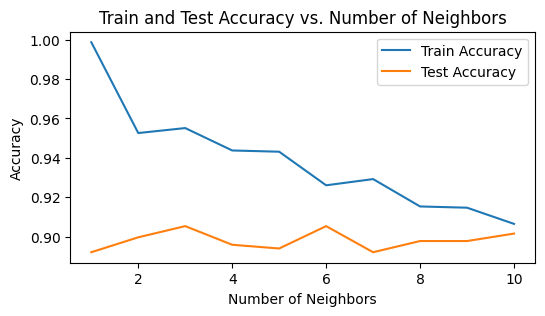

In [44]:
plt.figure(figsize=(6, 3))
plt.plot((range(1, 11)), train_accuracies, label='Train Accuracy')
plt.plot((range(1, 11)), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()

In [45]:
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [46]:
y_pred = knn_classifier.predict(X_test_scaled)

In [47]:
accuracy_score(y_test, y_pred)

0.8996212121212122

6. *XGboost*

In [48]:
from xgboost import XGBClassifier

In [49]:
xgb = XGBClassifier(max_depth  = 5 ,  n_estimators  = 6 , learning_rate = 0.4)

In [50]:
xgb.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=6, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [51]:
print (xgb.score(x_train , y_train))
print (xgb.score(x_test , y_test))

0.9797724399494311

0.9507575757575758


In [52]:
y_pred= xgb.predict(x_test)

In [53]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:

               precision    recall  f1-score   support



         0.0       0.95      0.99      0.97       411

         1.0       0.92      0.79      0.85        76

         2.0       0.97      0.90      0.94        41



    accuracy                           0.95       528

   macro avg       0.95      0.89      0.92       528

weighted avg       0.95      0.95      0.95       528




In [54]:
confusion_matrix(y_test, y_pred)

array([[405,   5,   1],
       [ 16,  60,   0],
       [  4,   0,  37]])

7. *Adaboost*

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
ada = AdaBoostClassifier( n_estimators=5,
    learning_rate=0.3)

In [57]:
ada.fit(x_train , y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=5)

In [58]:
print (ada.score(x_train , y_train))
print (ada.score(x_test , y_test))

0.8489254108723135

0.8636363636363636


In [59]:
y_pred= ada.predict(x_test)

In [60]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:

               precision    recall  f1-score   support



         0.0       0.88      0.99      0.93       411

         1.0       0.77      0.64      0.70        76

         2.0       0.00      0.00      0.00        41



    accuracy                           0.86       528

   macro avg       0.55      0.55      0.54       528

weighted avg       0.79      0.86      0.82       528




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
confusion_matrix(y_test, y_pred)

array([[407,   4,   0],
       [ 27,  49,   0],
       [ 30,  11,   0]])

8. *Voting*

In [62]:
from sklearn.ensemble import VotingClassifier

In [63]:
v_clf = VotingClassifier(estimators=[('LR' , logreg_model) ,('SVM',svm_classifier), ('DT' , dt) , ("RF" , rf) , ("xgb" , xgb),('Ada',ada),('KNN',knn_classifier)] , voting= 'hard')

In [64]:
v_clf.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LR', LogisticRegression()), ('SVM', SVC()),
                             ('DT',
                              DecisionTreeClassifier(max_depth=3,
                                                     max_features=4)),
                             ('RF',
                              RandomForestClassifier(max_depth=3,
                                                     max_features=3,
                                                     n_estimators=5)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_r...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=6, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob',
                                            predictor=None, ...)),
                             ('Ada',
                              AdaBoostClassifier(learning_rate=0.3,
                                                 n_estimators=5)),
                             ('KNN', KNeighborsClassifier(n_neighbors=11))])

In [65]:
print (v_clf.score(x_train , y_train))
print (v_clf.score(x_test , y_test))

0.9102402022756005

0.9015151515151515
